In [1]:
# importing all the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import idx2numpy

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


# 8.1 DATASET

In [2]:
X_train = idx2numpy.convert_from_file(r'train-images.idx3-ubyte')
X_test = idx2numpy.convert_from_file(r't10k-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
y_test = idx2numpy.convert_from_file(r't10k-labels.idx1-ubyte')

In [3]:
X_train = X_train[:15000]
X_test = X_test[:2500]
y_train = y_train[:15000]
y_test = y_test[:2500]



# 8.2 DATA PREPARATION

In [4]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

#NORMALIZING DATASET

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(15000, 784)


In [5]:
#printing the shape of dataset after reshaping.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15000, 784) (15000,)
(2500, 784) (2500,)


10 images from training set


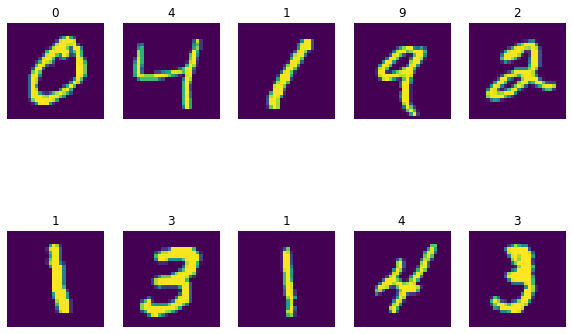

In [6]:
#printing 10 images from train dataset

print('10 images from training set')
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 5
Image =[0,0,0,0,0,0,0,0,0,0,0]
for i in range(1,11):
    Image[i] = X_train[i].reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image[i])
    plt.axis('off')
    plt.title(y_train[i])

  

10 images from testing set


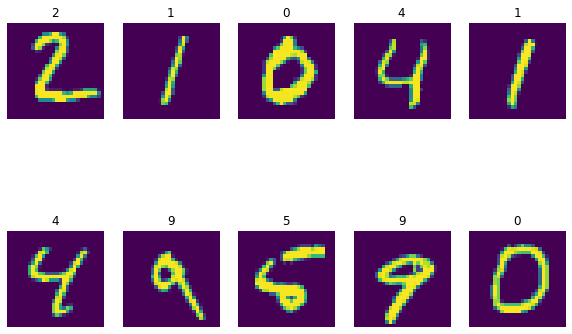

In [7]:
#printing 10 images from train dataset

print('10 images from testing set')
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 5
Image =[0,0,0,0,0,0,0,0,0,0,0]
for i in range(1,11):
    Image[i] = X_test[i].reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image[i])
    plt.axis('off')
    plt.title(y_test[i])

# 8.3 Determining the best value of 'k' as it is a hyper-parameter

In [8]:
# list of accuracies for each value of k
kVals = [1,2,3,4,5,6,7,8,9,10,11]
accuracies = []

# loop over kVals
for k in kVals:
# train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
# evaluate the model and print the accuracies list
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# k with largest accuracy will be chosen for final training
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)

print("\nk=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))

k=1, accuracy=92.64%
k=2, accuracy=91.84%
k=3, accuracy=92.92%
k=4, accuracy=92.96%
k=5, accuracy=92.84%
k=6, accuracy=92.44%
k=7, accuracy=92.76%
k=8, accuracy=92.32%
k=9, accuracy=92.48%
k=10, accuracy=92.40%
k=11, accuracy=92.08%

k=4 achieved highest accuracy of 92.96% on validation data


# Building and Evaluating the model using the best value of k

In [9]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])

# train the model again
model.fit(X_train, y_train)

# Predict labels for the test set
predictions = model.predict(X_test)

# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=predictions), "\n")

Accuracy: 0.9296 



In [10]:
# Evaluate performance of model for each of the digits
print("Evaluating on test data: ")
print(classification_report(y_test, predictions))

Evaluating on test data: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       219
           1       0.88      0.99      0.93       287
           2       0.98      0.89      0.93       276
           3       0.90      0.95      0.93       254
           4       0.94      0.93      0.94       275
           5       0.94      0.92      0.93       221
           6       0.96      0.96      0.96       225
           7       0.91      0.93      0.92       257
           8       0.99      0.82      0.90       242
           9       0.92      0.90      0.91       244

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500



Showing 10 Predicted label with it's corresponding images out of which 7 are correct.


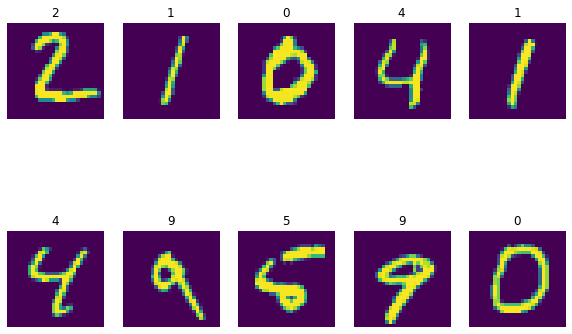

In [11]:
print("Showing 10 Predicted label with it's corresponding images out of which 7 are correct.")
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 5
Image =[0,0,0,0,0,0,0,0,0,0,0]
for i in range(1,11):
    Image[i] = X_test[i].reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image[i])
    plt.axis('off')
    plt.title(predictions[i])

# 8.4 Retrieval Performance with Original Data

In [12]:
# list of accuracies for each value of k
kVals = [1,2,5,10,20,50,100,200,500,1000]
accuracies = []

# loop over kVals
for k in kVals:
# train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
# evaluate the model and print the accuracies list
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    print("Evaluating on test data: ")
    print(classification_report(y_test, predictions))
    print('--------------------------------------------------------------')

k=1, accuracy=92.64%
Evaluating on test data: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.96       219
           1       0.92      0.99      0.95       287
           2       0.97      0.89      0.93       276
           3       0.91      0.92      0.91       254
           4       0.94      0.90      0.92       275
           5       0.92      0.92      0.92       221
           6       0.94      0.96      0.95       225
           7       0.92      0.94      0.93       257
           8       0.95      0.84      0.89       242
           9       0.87      0.92      0.89       244

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500

--------------------------------------------------------------
k=2, accuracy=91.84%
Evaluating on test data: 
              precision    recall  f1-score   support

           0       0.90      

In [13]:
precision = np.array([0.93,0.92,0.93,0.93,0.92,0.90,0.88,0.86,0.82,0.78])
K_value = np.array([1,2,5,10,20,50,100,200,500,1000])

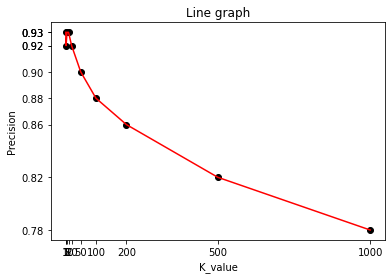

In [14]:
plt.title("Line graph")
plt.xlabel("K_value")
plt.ylabel("Precision")
plt.plot(K_value,precision , color ="red",)
plt.xticks(K_value)
plt.yticks(precision)
plt.scatter(K_value,precision , color ="black",)
plt.show()


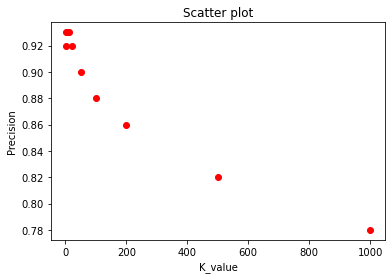

In [15]:
plt.title("Scatter plot")
plt.xlabel("K_value")
plt.ylabel("Precision")
plt.scatter(K_value,precision , color ="red",)
plt.show()